<a href="https://colab.research.google.com/github/oyyarko/keras_tut/blob/master/CIFAR_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow

In [0]:
!pip uninstall tensorflow

In [0]:
!pip install tensorflow==2.0.0

In [0]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

MLP based CIFAR classification

In [2]:
#import dataset
import keras
from keras.datasets import cifar10

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


Visualize initial data from the CIFAR10 dataset
We will use matplotlib library

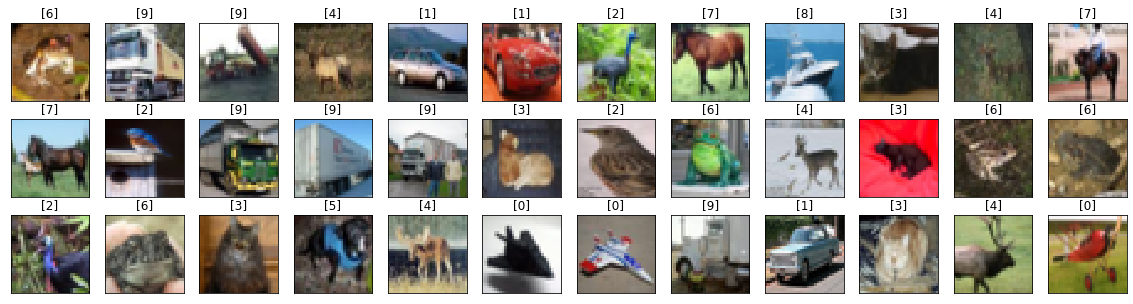

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

fig = plt.figure(figsize=(20, 5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title(str(y_train[i]))

Rescale the data by diving the pixel of the images by 255
So the input will lie within [0, 1]

In [0]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

Break the dataset into training, testing and Validation dataset!!

Enable one-hot encoding scheme

In [7]:
from keras.utils import np_utils

num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print('X Train shape: ',x_train.shape)

print(x_train.shape[0], 'X Train samples')
print(x_test.shape[0], 'X Test samples')
print(x_valid.shape[0], 'X Valid samples')

X Train shape:  (45000, 32, 32, 3)
45000 X Train samples
10000 X Test samples
5000 X Valid samples


Define the MLP Model Architecure 

This model will only work on Dense, Dropout and Flatten layers

In [8]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten

model = Sequential()
model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              3073000   
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 3,590,642
Trainable params:

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [0]:
from tensorflow.python.keras.callbacks import ModelCheckpoint

In [11]:
checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/Deep Learning Cloud/MLP.weights.best.hdf5', verbose=1, save_best_only=True)

hist = model.fit(x_train, y_train, batch_size = 32, epochs = 20, verbose=2, callbacks=[checkpointer], validation_data=(x_valid, y_valid), shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20

Epoch 00001: val_loss improved from inf to 1.85300, saving model to /content/drive/My Drive/Deep Learning Cloud/MLP.weights.best.hdf5
45000/45000 - 8s - loss: 2.0555 - acc: 0.2685 - val_loss: 1.8530 - val_acc: 0.3148
Epoch 2/20

Epoch 00002: val_loss improved from 1.85300 to 1.72071, saving model to /content/drive/My Drive/Deep Learning Cloud/MLP.weights.best.hdf5
45000/45000 - 6s - loss: 1.8437 - acc: 0.3350 - val_loss: 1.7207 - val_acc: 0.3752
Epoch 3/20

Epoch 00003: val_loss did not improve from 1.72071
45000/45000 - 6s - loss: 1.8019 - acc: 0.3520 - val_loss: 1.7405 - val_acc: 0.3754
Epoch 4/20

Epoch 00004: val_loss did not improve from 1.72071
45000/45000 - 6s - loss: 1.7818 - acc: 0.3616 - val_loss: 1.7264 - val_acc: 0.3862
Epoch 5/20

Epoch 00005: val_loss improved from 1.72071 to 1.67829, saving model to /content/drive/My Drive/Deep Learning Cloud/MLP.weights.best.hdf5
45000/45000 - 7s - loss: 1.7724 - acc: 0.3710 -

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test Accuracy: ', score[1])


 Test Accuracy:  0.3368
